In [5]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_full_technical_analysis(symbol, name=None):
    # Fetch 10 years of daily data
    stock = yf.Ticker(symbol)
    df = stock.history(period="10y")
    if df.empty:
        print(f"No data found for {symbol}")
        return
    
    df = df[["Close", "Volume"]].copy()
    df["SMA_12"] = df["Close"].rolling(12).mean()
    df["SMA_26"] = df["Close"].rolling(26).mean()
    df["EMA_12"] = df["Close"].ewm(span=12, adjust=False).mean()
    df["EMA_26"] = df["Close"].ewm(span=26, adjust=False).mean()
    df["MACD"] = df["EMA_12"] - df["EMA_26"]
    df["MACD_Signal"] = df["MACD"].ewm(span=9, adjust=False).mean()

    # Bollinger Bands
    df["BB_Mid"] = df["Close"].rolling(20).mean()
    df["BB_Upper"] = df["BB_Mid"] + 2 * df["Close"].rolling(20).std()
    df["BB_Lower"] = df["BB_Mid"] - 2 * df["Close"].rolling(20).std()

    # RSI
    delta = df["Close"].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(14).mean()
    avg_loss = loss.rolling(14).mean()
    rs = avg_gain / avg_loss
    df["RSI"] = 100 - (100 / (1 + rs))

    # Stochastic Oscillator
    low_14 = df["Close"].rolling(14).min()
    high_14 = df["Close"].rolling(14).max()
    df["%K"] = 100 * ((df["Close"] - low_14) / (high_14 - low_14))
    df["%D"] = df["%K"].rolling(3).mean()

    # Average True Range (ATR)
    high = stock.history(period="10y")["High"]
    low = stock.history(period="10y")["Low"]
    close = df["Close"]
    tr1 = high - low
    tr2 = abs(high - close.shift(1))
    tr3 = abs(low - close.shift(1))
    tr = pd.concat([tr1, tr2, tr3], axis=1).max(axis=1)
    df["ATR"] = tr.rolling(14).mean()

    # Peak and Trough detection
    df["Peaks"] = df["Close"] == df["Close"].rolling(15, center=True).max()
    df["Troughs"] = df["Close"] == df["Close"].rolling(15, center=True).min()

    # Trend slope (last 60 days)
    if len(df) >= 60:
        y = df["Close"].iloc[-60:].values
        x = np.arange(len(y))
        coeffs = np.polyfit(x, y, 1)
        slope_line = coeffs[0] * x + coeffs[1]
    else:
        slope_line = None

    # Plotting
    fig = plt.figure(figsize=(16, 14))
    gs = fig.add_gridspec(4, 1, height_ratios=[3, 1, 1, 1])

    # Price and Indicators
    ax1 = fig.add_subplot(gs[0])
    ax1.plot(df.index, df["Close"], label="Close", color="black")
    ax1.plot(df.index, df["SMA_12"], label="SMA 12", linestyle="--", color="blue")
    ax1.plot(df.index, df["SMA_26"], label="SMA 26", linestyle="--", color="orange")
    ax1.plot(df.index, df["EMA_12"], label="EMA 12", linestyle=":", color="green")
    ax1.plot(df.index, df["EMA_26"], label="EMA 26", linestyle=":", color="purple")
    ax1.fill_between(df.index, df["BB_Upper"], df["BB_Lower"], color="gray", alpha=0.2, label="Bollinger Bands")

    ax1.scatter(df.index[df["Peaks"]], df["Close"][df["Peaks"]], color="limegreen", label="Peaks", marker="^", s=30)
    ax1.scatter(df.index[df["Troughs"]], df["Close"][df["Troughs"]], color="red", label="Troughs", marker="v", s=30)

    if slope_line is not None:
        ax1.plot(df.index[-60:], slope_line, label="Trend Slope (60d)", color="magenta", linestyle="--")

    ax1.set_title(f"{name or symbol} - 10Y Technical Analysis")
    ax1.set_ylabel("Price")
    ax1.legend(loc="upper left")
    ax1.grid(True)

    # RSI and Stochastic
    ax2 = fig.add_subplot(gs[1])
    ax2.plot(df.index, df["RSI"], label="RSI", color="teal")
    ax2.axhline(70, color="red", linestyle="--", alpha=0.5)
    ax2.axhline(30, color="green", linestyle="--", alpha=0.5)
    ax2.set_ylim(0, 100)
    ax2.set_ylabel("RSI")
    ax2.set_title("Relative Strength Index")
    ax2.grid(True)
    ax2.legend(loc="upper left")

    # MACD
    ax3 = fig.add_subplot(gs[2])
    ax3.plot(df.index, df["MACD"], label="MACD", color="darkblue")
    ax3.plot(df.index, df["MACD_Signal"], label="Signal Line", color="red", linestyle="--")
    ax3.set_title("MACD")
    ax3.legend(loc="upper left")
    ax3.grid(True)

    # Volume and ATR
    ax4 = fig.add_subplot(gs[3])
    ax4.plot(df.index, df["ATR"], label="ATR", color="darkgreen")
    ax4.set_title("Average True Range (ATR)")
    ax4.set_ylabel("Volatility")
    ax4.legend(loc="upper left")
    ax4.grid(True)

    plt.tight_layout()
    plt.show()


In [8]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_full_technical_analysis(symbol, name=None):
    # Fetch 10 years of daily data
    stock = yf.Ticker(symbol)
    df = stock.history(period="10y")
    if df.empty:
        print(f"No data found for {symbol}")
        return
    
    df = df[["Close", "Volume"]].copy()
    df["SMA_12"] = df["Close"].rolling(12).mean()
    df["SMA_26"] = df["Close"].rolling(26).mean()
    df["EMA_12"] = df["Close"].ewm(span=12, adjust=False).mean()
    df["EMA_26"] = df["Close"].ewm(span=26, adjust=False).mean()
    df["MACD"] = df["EMA_12"] - df["EMA_26"]
    df["MACD_Signal"] = df["MACD"].ewm(span=9, adjust=False).mean()
    df["MACD_Hist"] = df["MACD"] - df["MACD_Signal"]

    # Bollinger Bands
    df["BB_Mid"] = df["Close"].rolling(20).mean()
    df["BB_Upper"] = df["BB_Mid"] + 2 * df["Close"].rolling(20).std()
    df["BB_Lower"] = df["BB_Mid"] - 2 * df["Close"].rolling(20).std()

    # RSI
    delta = df["Close"].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(14).mean()
    avg_loss = loss.rolling(14).mean()
    rs = avg_gain / avg_loss
    df["RSI"] = 100 - (100 / (1 + rs))

    # Stochastic Oscillator
    low_14 = df["Close"].rolling(14).min()
    high_14 = df["Close"].rolling(14).max()
    df["%K"] = 100 * ((df["Close"] - low_14) / (high_14 - low_14))
    df["%D"] = df["%K"].rolling(3).mean()

    # Peak and Trough detection
    df["Peaks"] = df["Close"] == df["Close"].rolling(15, center=True).max()
    df["Troughs"] = df["Close"] == df["Close"].rolling(15, center=True).min()

    # Trend slope (last 60 days)
    if len(df) >= 60:
        y = df["Close"].iloc[-60:].values
        x = np.arange(len(y))
        coeffs = np.polyfit(x, y, 1)
        slope_line = coeffs[0] * x + coeffs[1]
    else:
        slope_line = None

    # Plotting
    fig = plt.figure(figsize=(16, 14))
    gs = fig.add_gridspec(4, 1, height_ratios=[3, 1, 1, 1])

    # Price and Indicators
    ax1 = fig.add_subplot(gs[0])
    ax1.plot(df.index, df["Close"], label="Close", color="black")
    ax1.plot(df.index, df["SMA_12"], label="SMA 12", linestyle="--", color="blue")
    ax1.plot(df.index, df["SMA_26"], label="SMA 26", linestyle="--", color="orange")
    ax1.plot(df.index, df["EMA_12"], label="EMA 12", linestyle=":", color="green")
    ax1.plot(df.index, df["EMA_26"], label="EMA 26", linestyle=":", color="purple")
    ax1.fill_between(df.index, df["BB_Upper"], df["BB_Lower"], color="gray", alpha=0.2, label="Bollinger Bands")

    ax1.scatter(df.index[df["Peaks"]], df["Close"][df["Peaks"]], color="limegreen", label="Peaks", marker="^", s=30)
    ax1.scatter(df.index[df["Troughs"]], df["Close"][df["Troughs"]], color="red", label="Troughs", marker="v", s=30)

    if slope_line is not None:
        ax1.plot(df.index[-60:], slope_line, label="Trend Slope (60d)", color="magenta", linestyle="--")

    ax1.set_title(f"{name or symbol} - 10Y Technical Analysis")
    ax1.set_ylabel("Price")
    ax1.legend(loc="upper left")
    ax1.grid(True)

    # RSI and Stochastic
    ax2 = fig.add_subplot(gs[1])
    ax2.plot(df.index, df["RSI"], label="RSI", color="teal")
    ax2.axhline(70, color="red", linestyle="--", alpha=0.5)
    ax2.axhline(30, color="green", linestyle="--", alpha=0.5)
    ax2.set_ylim(0, 100)
    ax2.set_ylabel("RSI")
    ax2.set_title("Relative Strength Index")
    ax2.grid(True)
    ax2.legend(loc="upper left")

    # MACD Line and Signal Line
    ax3 = fig.add_subplot(gs[2])
    ax3.plot(df.index, df["MACD"], label="MACD", color="darkblue")
    ax3.plot(df.index, df["MACD_Signal"], label="Signal Line", color="red", linestyle="--")
    ax3.set_title("MACD and Signal Line")
    ax3.legend(loc="upper left")
    ax3.grid(True)

    # MACD Histogram
    ax4 = fig.add_subplot(gs[3])
    ax4.bar(df.index, df["MACD_Hist"], label="MACD Histogram", color="green", alpha=0.6)
    ax4.axhline(0, color="black", linewidth=1, linestyle="--")
    ax4.set_title("MACD Histogram")
    ax4.set_ylabel("MACD Diff")
    ax4.grid(True)
    ax4.legend(loc="upper left")

    plt.tight_layout()
    plt.show()


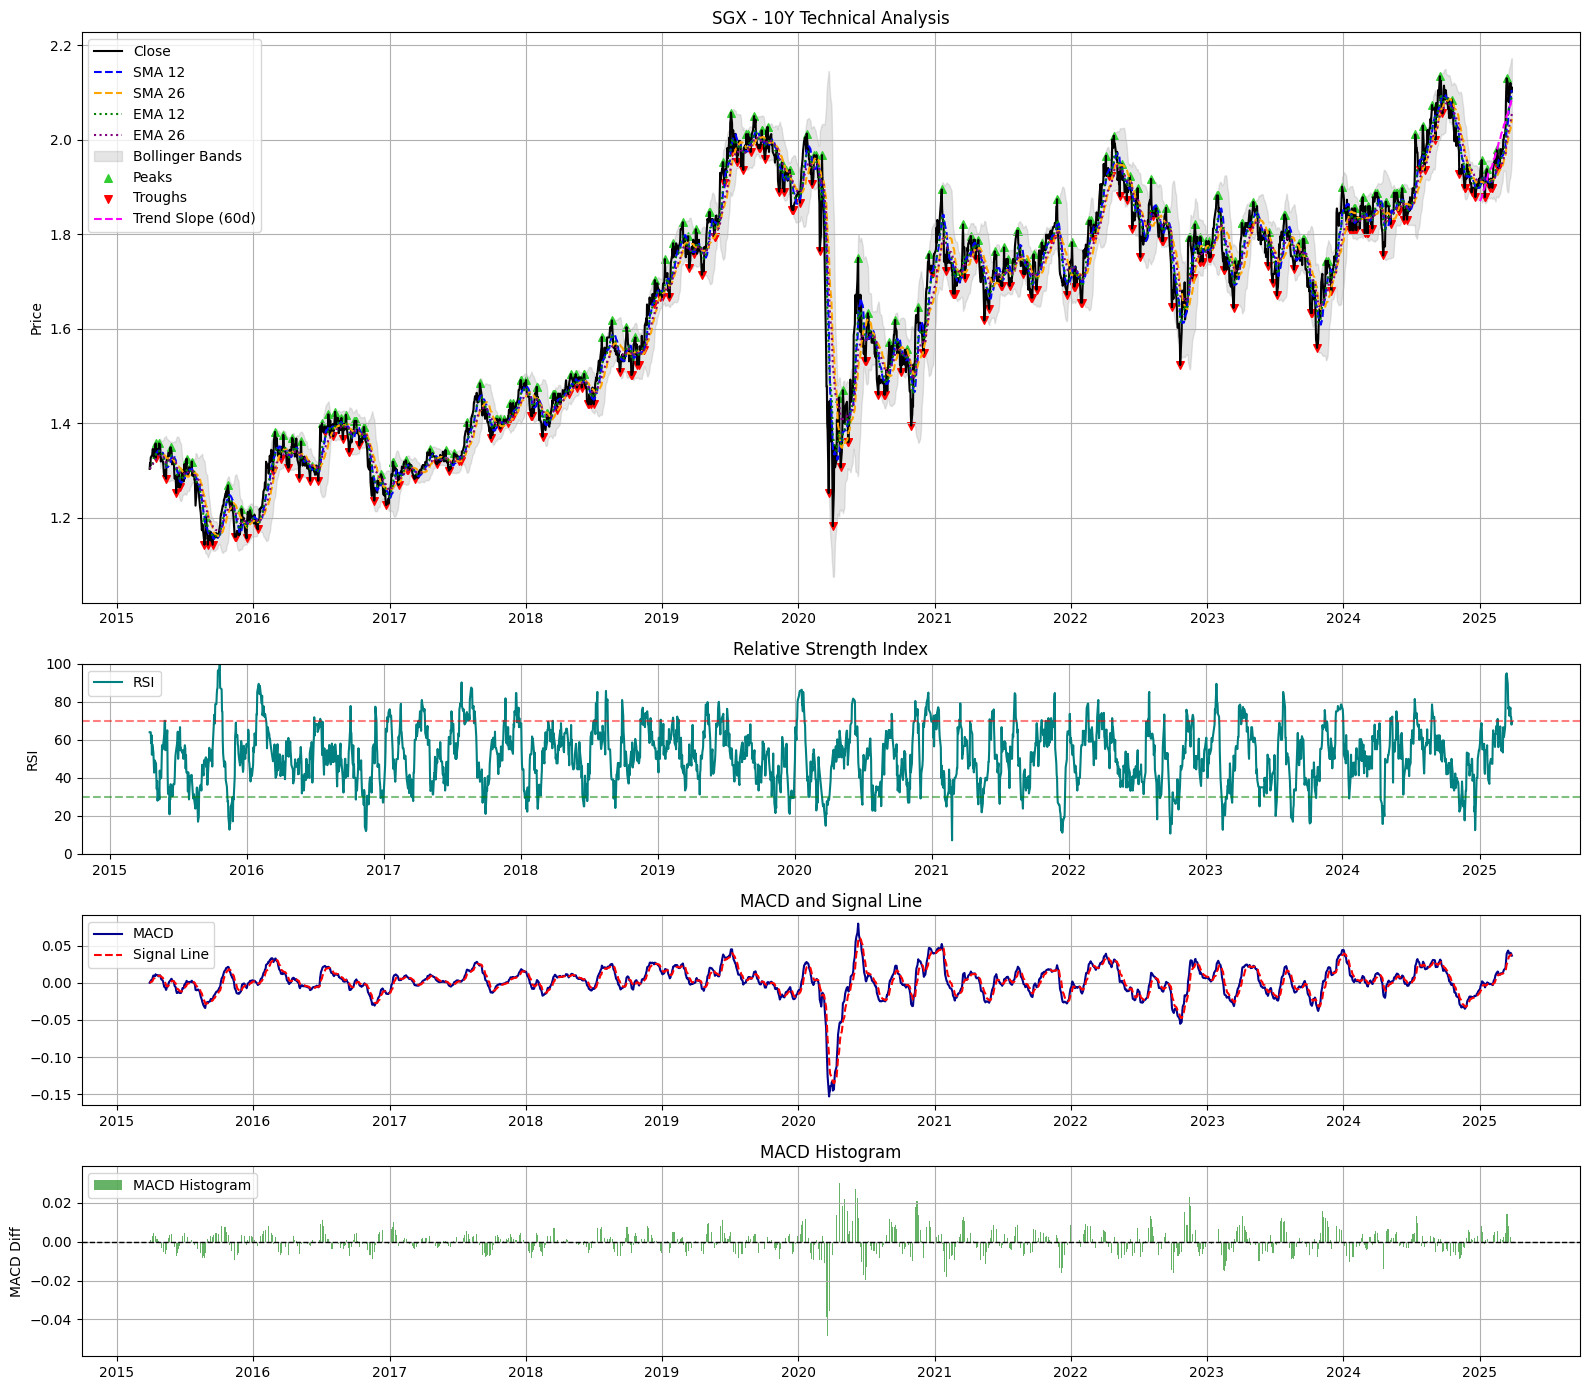

In [9]:
plot_full_technical_analysis("C38U.SI", name="SGX")
